https://www.kaggle.com/datasets/gregorut/videogamesales/data

### Import Data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("vgsales[1].csv")
data.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


### EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [4]:
data.nunique(axis=0)

Rank            16598
Name            11493
Platform           31
Year               39
Genre              12
Publisher         578
NA_Sales          409
EU_Sales          305
JP_Sales          244
Other_Sales       157
Global_Sales      623
dtype: int64

In [5]:
data.Publisher.unique()

array(['Nintendo', 'Microsoft Game Studios', 'Take-Two Interactive',
       'Sony Computer Entertainment', 'Activision', 'Ubisoft',
       'Bethesda Softworks', 'Electronic Arts', 'Sega', 'SquareSoft',
       'Atari', '505 Games', 'Capcom', 'GT Interactive',
       'Konami Digital Entertainment',
       'Sony Computer Entertainment Europe', 'Square Enix', 'LucasArts',
       'Virgin Interactive', 'Warner Bros. Interactive Entertainment',
       'Universal Interactive', 'Eidos Interactive', 'RedOctane',
       'Vivendi Games', 'Enix Corporation', 'Namco Bandai Games',
       'Palcom', 'Hasbro Interactive', 'THQ', 'Fox Interactive',
       'Acclaim Entertainment', 'MTV Games', 'Disney Interactive Studios',
       nan, 'Majesco Entertainment', 'Codemasters', 'Red Orb', 'Level 5',
       'Arena Entertainment', 'Midway Games', 'JVC', 'Deep Silver',
       '989 Studios', 'NCSoft', 'UEP Systems', 'Parker Bros.', 'Maxis',
       'Imagic', 'Tecmo Koei', 'Valve Software', 'ASCII Entertainment',


In [6]:
data.isnull().sum()[data.isnull().sum() > 0]

Year         271
Publisher     58
dtype: int64

In [7]:
# fill NaN
data["Year"].fillna(data.Year.mean(), inplace = True)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


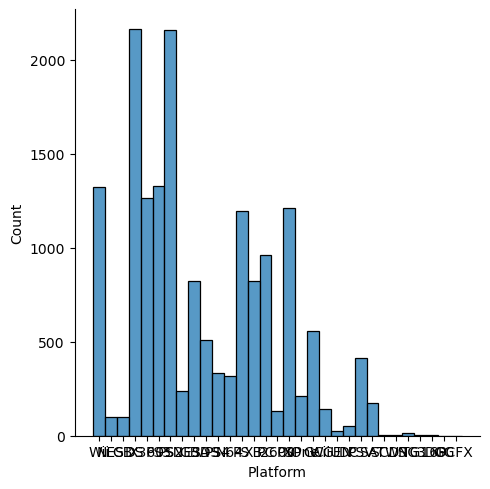

In [8]:
sns.displot(x=data.Platform,data=data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


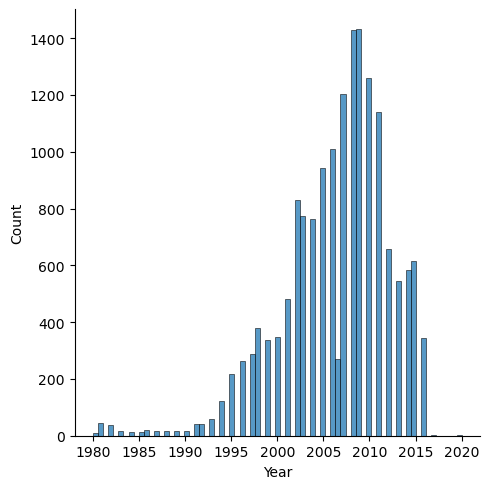

In [9]:
sns.displot(x=data.Year,data=data)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


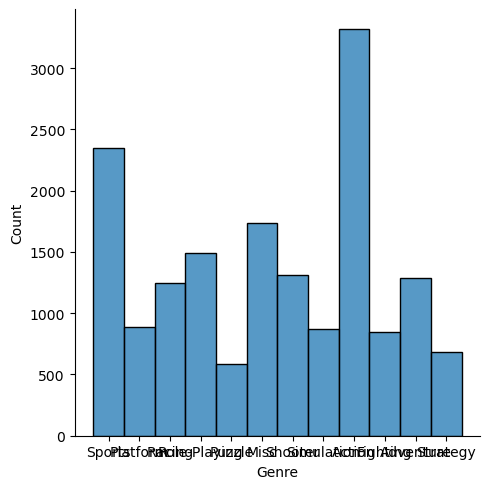

In [10]:
sns.displot(x=data.Genre,data=data)

<Axes: >

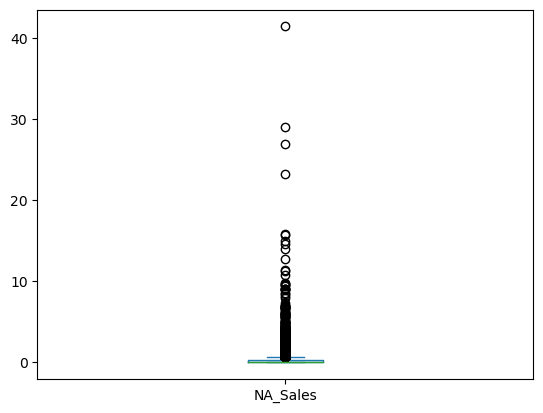

In [11]:
data.NA_Sales.plot(kind="box")

<Axes: >

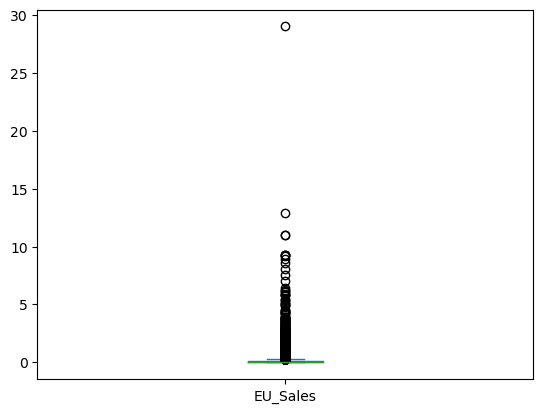

In [12]:
data.EU_Sales.plot(kind="box")

<Axes: >

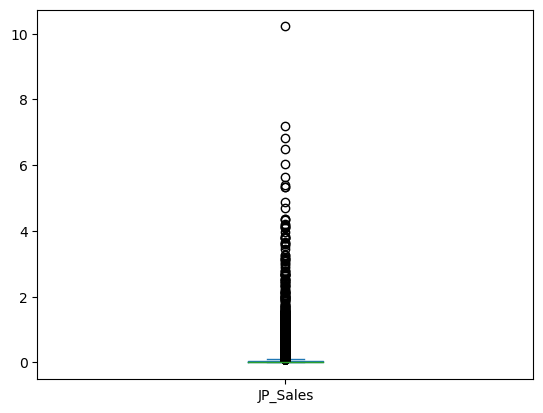

In [13]:
data.JP_Sales.plot(kind="box")

<Axes: >

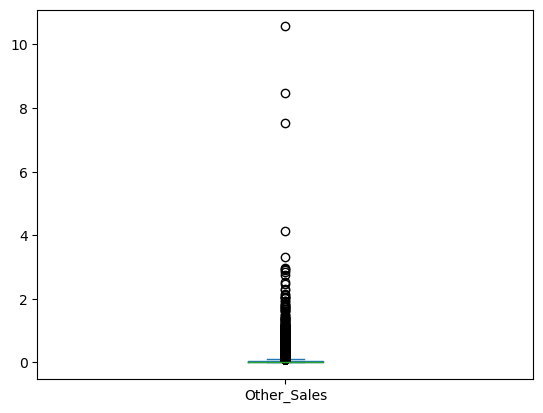

In [14]:
data.Other_Sales.plot(kind="box")

<Axes: >

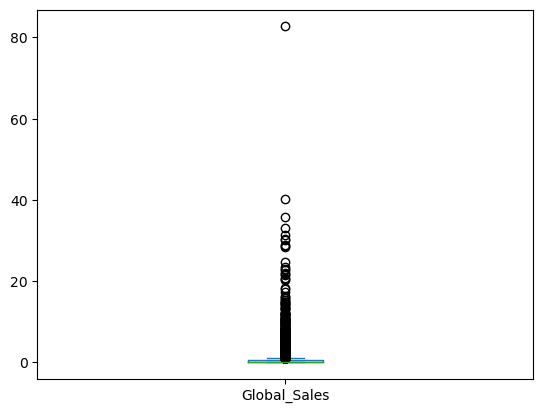

In [15]:
data.Global_Sales.plot(kind="box")

In [16]:
data.nlargest(3, "Other_Sales").index

Index([17, 0, 47], dtype='int64')

In [17]:
#drop outliers
data.drop([0, 4, 17, 47], inplace=True)

In [18]:
#drop unwanted columns
data.drop(columns=["Rank","Name","NA_Sales","EU_Sales","JP_Sales","Other_Sales"],inplace=True)
data.head()

,Platform,Year,Genre,Publisher,Global_Sales
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1989.0,Puzzle,Nintendo,30.26
6,DS,2006.0,Platform,Nintendo,30.01


In [19]:
data.head(20)

,Platform,Year,Genre,Publisher,Global_Sales
1,NES,1985.0,Platform,Nintendo,40.24
2,Wii,2008.0,Racing,Nintendo,35.82
3,Wii,2009.0,Sports,Nintendo,33.00
5,GB,1989.0,Puzzle,Nintendo,30.26
6,DS,2006.0,Platform,Nintendo,30.01
7,Wii,2006.0,Misc,Nintendo,29.02
8,Wii,2009.0,Platform,Nintendo,28.62
9,NES,1984.0,Shooter,Nintendo,28.31
10,DS,2005.0,Simulation,Nintendo,24.76
11,DS,2005.0,Racing,Nintendo,23.42


## Encoding

In [20]:
data = pd.get_dummies(data, drop_first = True)

In [21]:
data.head()

,Year,Global_Sales,Platform_3DO,Platform_3DS,Platform_DC,Platform_DS,Platform_GB,Platform_GBA,Platform_GC,Platform_GEN,...,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_dramatic create,Publisher_fonfun,Publisher_iWin,Publisher_id Software,Publisher_imageepoch Inc.,Publisher_inXile Entertainment,"Publisher_mixi, Inc",Publisher_responDESIGN
1,1985.0,40.24,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2008.0,35.82,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2009.0,33.00,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,1989.0,30.26,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,2006.0,30.01,False,False,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## Machine Learning

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [23]:
#split the dataset by 80% and 20%
x,x_test,y,y_test=train_test_split(data.drop(columns="Global_Sales"),
                                   data.Global_Sales,
                                   random_state=42,
                                   test_size=.2)

In [24]:
print(x.shape,"\n",x_test.shape,"\n",y.shape,"\n",y_test.shape)

(13275, 619) 
 (3319, 619) 
 (13275,) 
 (3319,)


In [25]:
model=LinearRegression()

In [26]:
model.fit(x,y)

LinearRegression()

In [27]:
result=model.predict(x_test)

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
mse = mean_squared_error(y_test, result)
mse

2.079700965264009

In [30]:
result[:10]

array([0.0387881 , 1.03588003, 0.11365301, 0.11223075, 0.25455228,
       0.24504681, 2.63885155, 0.64871341, 0.05395915, 0.64440261])

In [31]:
y_test[:10]

14028    0.04
4793     0.40
16511    0.01
14766    0.03
5215     0.36
724      2.23
4922     0.39
3111     0.65
13472    0.04
4451     0.44
Name: Global_Sales, dtype: float64